In [59]:
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import re
from decimal import Decimal
from matplotlib import pyplot as plt

from IPython.lib.display import IFrame
from IPython.display import display

In [30]:
accts = [
1224940010024,
1224940010023,
1224940010022,
1224940010021,
1224940020022,
1224940010020,
1224940020021,
1224940010019,
1224940020020,
1224940010018,
1224940020019,
1224940010017,
1224940010016,
1224940020018,
1224940010015,
1224940020017,
1224940010014,
1224940020016,
1224940010013,
1224940020015,
1224940010012,
1224940020014,
1224940010011,
1224940020013,
1224940010010,
1224940020012,
1224940010009
]

In [31]:
def appraisal_history(url, current_tax_year, acct):
    url = url % (current_tax_year, acct)
    history_page = urllib2.urlopen(url)
    history_soup = BeautifulSoup(history_page)
    history = history_soup.find_all('th')
    values = map(lambda k: int(k.text.replace(',', '').replace('$','')), history)
    return values

In [32]:
url = 'http://public.hcad.org/records/HistoryValue.asp?currenttaxyear=%d&LastTaxYear=&acct=%d'
values = appraisal_history(url, 2017, 1224940020021)
print values

[375198, 349889, 318081, 289165, 262878]


In [33]:
IFrame(url % params, 600, 200)

In [39]:
def appraisal_history_tenyear(url, acct):
    values1 = appraisal_history(url, 2017, acct)
    values1 = values1[::-1]
    values2 = appraisal_history(url, 2012, acct)
    values2 = values2[::-1]
    values2.extend(values1)
    return values2

In [41]:
accts_values = map(lambda acct: (acct, appraisal_history_tenyear(url, acct)), accts)
print accts_values

[(1224940010024L, [284809, 280937, 270000, 261000, 261000, 261000, 287100, 315810, 347391, 382130]), (1224940010023L, [245553, 238000, 230000, 230000, 225773, 225773, 248350, 273185, 351024, 351024]), (1224940010022L, [267918, 267918, 267918, 254000, 254000, 250097, 275106, 302616, 392556, 392556]), (1224940010021L, [285500, 285500, 285500, 285500, 285500, 285500, 368997, 368997, 405896, 408748]), (1224940020022L, [292723, 292723, 292723, 292723, 292723, 292723, 321995, 354194, 389613, 415942]), (1224940010020L, [294986, 294986, 294986, 294986, 294986, 294986, 324484, 356932, 392625, 419562]), (1224940020021L, [262878, 262878, 262878, 262878, 262878, 262878, 289165, 318081, 349889, 375198]), (1224940010019L, [294986, 294986, 294986, 294986, 294986, 294986, 324484, 356932, 392625, 419562]), (1224940020020L, [292873, 290164, 286750, 272500, 272500, 272500, 299750, 329725, 416182, 416182]), (1224940010018L, [294986, 294986, 294986, 294986, 294986, 294986, 378803, 378803, 419562, 419562]),

In [60]:
df = pd.DataFrame(accts_values, columns=['Acct', 'Values'])
df['Pct'] = map(lambda values: [x/float(values[0]) for x in values], df['Values'])
display(df)

,Acct,Values,Pct
0,1224940010024,"[284809, 280937, 270000, 261000, 261000, 26100...","[1.0, 0.986404924002, 0.948003749881, 0.916403..."
1,1224940010023,"[245553, 238000, 230000, 230000, 225773, 22577...","[1.0, 0.969240856353, 0.93666133177, 0.9366613..."
2,1224940010022,"[267918, 267918, 267918, 254000, 254000, 25009...","[1.0, 1.0, 1.0, 0.948051269418, 0.948051269418..."
3,1224940010021,"[285500, 285500, 285500, 285500, 285500, 28550...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.29245884413, ..."
4,1224940020022,"[292723, 292723, 292723, 292723, 292723, 29272...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999897514, ..."
5,1224940010020,"[294986, 294986, 294986, 294986, 294986, 29498...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999796601, ..."
6,1224940020021,"[262878, 262878, 262878, 262878, 262878, 26287...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999695676, ..."
7,1224940010019,"[294986, 294986, 294986, 294986, 294986, 29498...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999796601, ..."
8,1224940020020,"[292873, 290164, 286750, 272500, 272500, 27250...","[1.0, 0.990750256937, 0.979093327142, 0.930437..."
9,1224940010018,"[294986, 294986, 294986, 294986, 294986, 29498...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.28413890829, ..."


In [61]:
display(df[['Acct', 'Pct']])

,Acct,Pct
0,1224940010024,"[1.0, 0.986404924002, 0.948003749881, 0.916403..."
1,1224940010023,"[1.0, 0.969240856353, 0.93666133177, 0.9366613..."
2,1224940010022,"[1.0, 1.0, 1.0, 0.948051269418, 0.948051269418..."
3,1224940010021,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.29245884413, ..."
4,1224940020022,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999897514, ..."
5,1224940010020,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999796601, ..."
6,1224940020021,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999695676, ..."
7,1224940010019,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.09999796601, ..."
8,1224940020020,"[1.0, 0.990750256937, 0.979093327142, 0.930437..."
9,1224940010018,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.28413890829, ..."


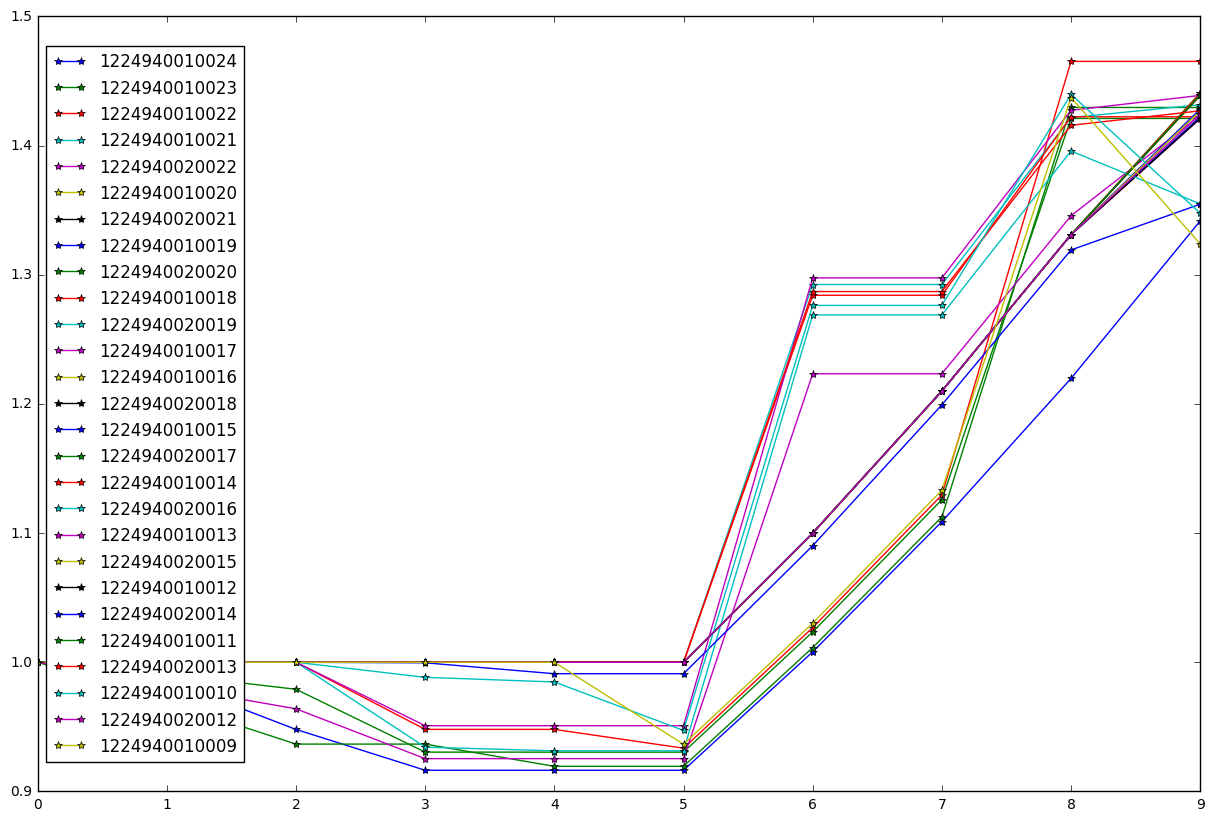

In [58]:
plt.figure(figsize=(15,10))
for k in df['Pct'].index:
    pct = df.loc[k, 'Pct']
    acct = df.loc[k, 'Acct']
    plt.plot(range(10), pct, '*-', label=str(acct))
plt.legend(loc='center left')
plt.show()

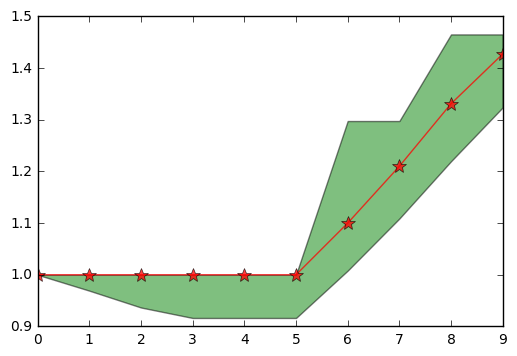

In [127]:
df_other = df.copy()[df.Acct != 1224940020021]
df_mine = df[df.Acct == 1224940020021]
pct_max = [1]*10
pct_min = [1]*10

for k in range(10):
    pct_max[k] = max(map(lambda pct: pct[k], df.Pct))
    pct_min[k] = min(map(lambda pct: pct[k], df.Pct))

plt.plot(range(10), df_mine.Pct.values[0], 'r*-', markersize=10, alpha=0.75)
plt.fill_between(range(10), pct_min, pct_max, facecolor='green', alpha=0.5)
    
plt.show()

In [71]:
df['LastIncrease'] = map(lambda values: values[-1]/float(values[-2])*100-100, df['Values'])
display(df[['Acct', 'LastIncrease']])

,Acct,LastIncrease
0,1224940010024,9.999971
1,1224940010023,0.000000
2,1224940010022,0.000000
3,1224940010021,0.702643
4,1224940020022,6.757731
5,1224940010020,6.860745
6,1224940020021,7.233437
7,1224940010019,6.860745
8,1224940020020,0.000000
9,1224940010018,0.000000


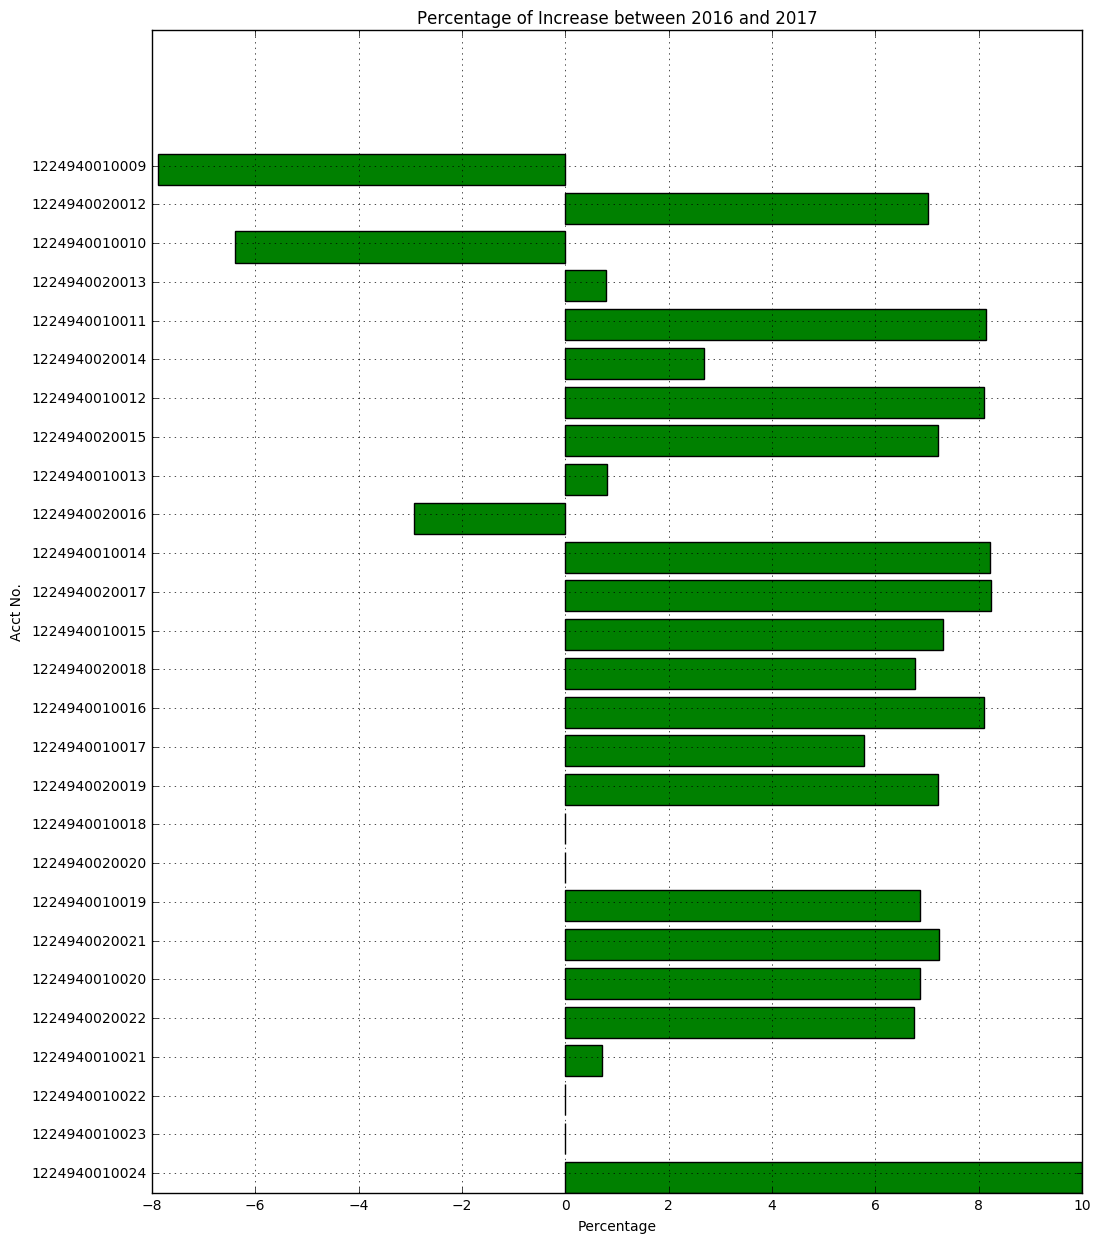

In [128]:
fig, ax = plt.subplots(figsize = (12,15))
ax.barh(range(len(df)), df['LastIncrease'].values, color='g')
ax.set_xlabel('Percentage')
ax.set_ylabel('Acct No.')
ax.set_yticks([k+0.5 for k in range(len(df))])
ax.set_yticklabels([str(k) for k in df['Acct'].values])
ax.grid('on')
ax.set_title('Percentage of Increase between 2016 and 2017')
plt.show()